In [1]:
# --------------------------------------------
# 📦 INSTALL REQUIRED DEPENDENCIES
# --------------------------------------------
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline



In [3]:
from sklearn.datasets import load_breast_cancer


In [4]:
cancer_dataset = load_breast_cancer()


In [5]:
print(cancer_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(cancer_dataset.DESCR)


.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst

In [8]:
# Standardize the Data
# --------------------------------------------
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
# Fit and transform the data
scaled_data = scaler.fit_transform(cancer_dataset['data'])
print("\nScaled Data Shape:", scaled_data.shape)


Scaled Data Shape: (569, 30)


In [11]:
# Apply PCA for Dimensionality Reduction (2 Components)
# --------------------------------------------
from sklearn.decomposition import PCA

In [12]:
# Create PCA instance with 2 components
pca = PCA(n_components=2)

In [13]:
pca_data = pca.fit_transform(scaled_data)

In [14]:
print("\nPCA Data (first 5 rows):\n", pca_data[:5])
print("\nExplained Variance by Components:", pca.explained_variance_)


PCA Data (first 5 rows):
 [[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 [ 7.1229532  10.27558912]
 [ 3.93530207 -1.94807157]]

Explained Variance by Components: [13.30499079  5.7013746 ]


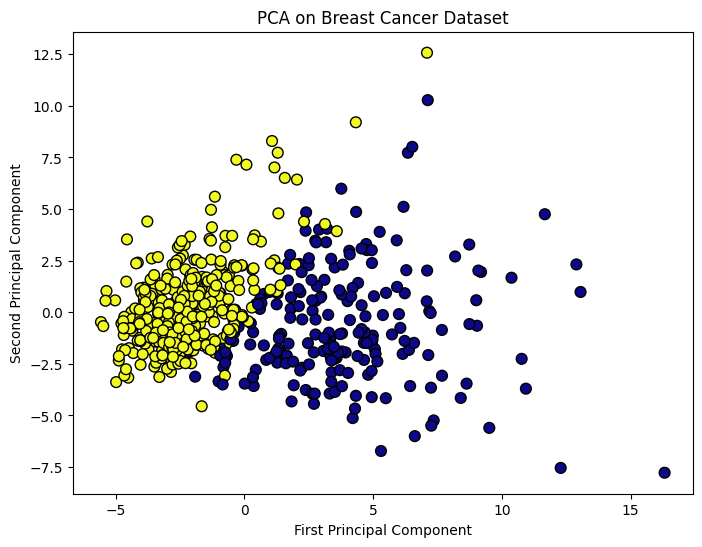

In [15]:
# Visualize PCA Result
# --------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=cancer_dataset['target'],
            cmap='plasma', edgecolor='k', s=60)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Breast Cancer Dataset')
plt.show()

In [16]:
# Full PCA to get all components
# --------------------------------------------
pca_all = PCA()
pca_all.fit(scaled_data)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [17]:
# Explained variance ratio (for each principal component)
print("\nExplained Variance Ratio (All Components):\n", pca_all.explained_variance_ratio_)



Explained Variance Ratio (All Components):
 [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


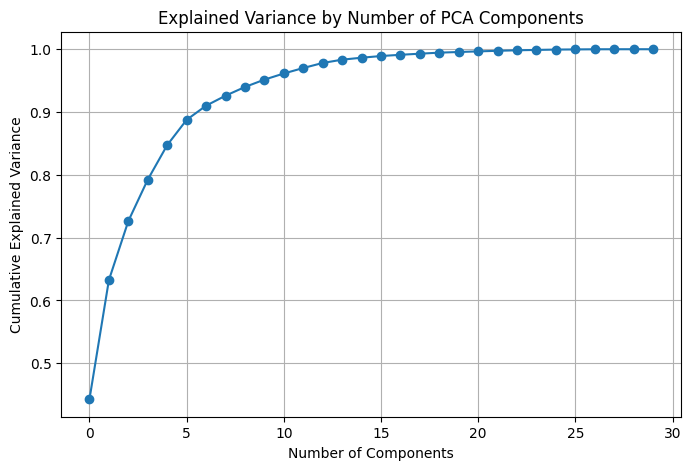

In [18]:
# Visualize cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()


In [19]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

# Generate moon-shaped synthetic dataset
X, y = make_moons(n_samples=100, random_state=123)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

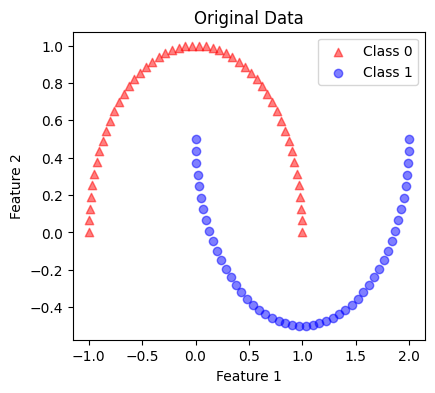

In [20]:
# Visualize Original Data vs Kernel PCA Transformed Data
# --------------------------------------------
plt.figure(figsize=(10, 4))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='Class 1')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

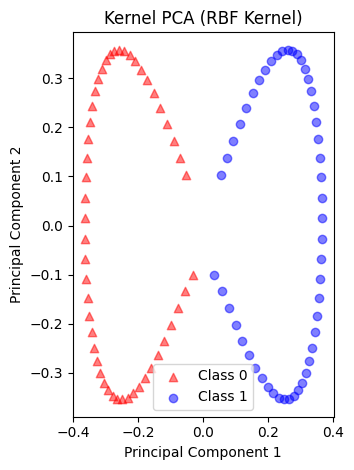

In [21]:
# Kernel PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', marker='^', alpha=0.5, label='Class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', marker='o', alpha=0.5, label='Class 1')
plt.title('Kernel PCA (RBF Kernel)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()